In [2]:
import math 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm   
import ipywidgets as widgets

In [2]:
def plot_standard_normal_pdf_cdf_with_failure_interactive(mC=100, sC=15, mD=60, sD=8):    
    mean = mC-mD
    std_dev = math.sqrt(sC**2 + sD**2)    
    failure_boundary = 0
    
    # Generate z values
    z = np.linspace(-4, 4, 1000)
    
    # Calculate PDF and CDF
    pdf = norm.pdf(z)
    cdf = norm.cdf(z)
    
    # Calculate the safety/reliability index
    z_failure = (failure_boundary - mean) / std_dev
    
    # Calculate the probability of failure
    prob_failure = norm.cdf(z_failure)
    
    # Create the plot with two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))
    fig.suptitle(f'Standard Normal Distribution: PDF and CDF\nNon-standard Distribution: μ={mean}, σ={std_dev}', fontsize=16)
    
    # Plot PDF
    ax1.plot(z, pdf, 'b-', label='Probability Density Function')
    ax1.fill_between(z[z < z_failure], pdf[z < z_failure], alpha=0.3, color='red', 
                     label=f'Failure Area: {prob_failure:.4f}')
    ax1.axvline(0, color='g', linestyle='--', label='z = 0')
    ax1.axvline(z_failure, color='r', linestyle='--', label=f'z_failure = {z_failure:.4f}')
    ax1.set_xlabel('z')
    ax1.set_ylabel('Probability Density')
    ax1.grid(True)
    ax1.legend()
    
    # Plot CDF
    ax2.plot(z, cdf, 'b-', label='Cumulative Distribution Function')
    ax2.axhline(prob_failure, color='r', linestyle=':', 
                label=f'P(Failure) = {prob_failure:.4f}')
    ax2.axvline(0, color='g', linestyle='--', label='z = 0')
    ax2.axvline(z_failure, color='r', linestyle='--', label=f'z_failure = {z_failure:.4f}')
    
    # Add arrow and annotation for CDF
    ax2.annotate('', xy=(z_failure, prob_failure), xytext=(z_failure, 0),
                 arrowprops=dict(arrowstyle='<->', color='red'))
    ax2.text(z_failure + 0.1, prob_failure/2, f'{prob_failure:.4f}', 
             color='red', va='center', ha='left')
    
    ax2.set_xlabel('z')
    ax2.set_ylabel('Cumulative Probability')
    ax2.grid(True)
    ax2.legend()
    plt.subplots_adjust(bottom=0.08)
    plt.show()

In [3]:
interactive_plot = widgets.interact(plot_standard_normal_pdf_cdf_with_failure_interactive, 
                                       mC=(0, 200, 0.1), 
                                       sC=(0, 200, 0.1), 
                                       mD=(0, 180, 0.1),  
                                       sD=(0, 180, 0.1))

interactive(children=(FloatSlider(value=100.0, description='mC', max=200.0), FloatSlider(value=15.0, descripti…

124
[ 3.17065492  3.2041585   3.24864963  3.3480069   3.40005206  3.43931264
  3.44898899  3.4578871   3.46333875  3.49345307  3.54084409  3.54090273
  3.56351239  3.59230733  3.68671668  3.69618472  3.70114941  3.74925392
  3.76463362  3.76651088  3.76702035  3.76971799  3.78411961  3.82459903
  3.87469768  3.89448717  3.9001693   3.95724596  3.96668697  3.99436381
  3.99915008  4.00065477  4.01329736  4.03384343  4.05490939  4.06416805
  4.06966705  4.07257482  4.07682991  4.07709709  4.08881945  4.11244247
  4.1142153   4.12149167  4.12504141  4.13119998  4.13125096  4.14571824
  4.15146221  4.17760264  4.19162322  4.19809363  4.20514209  4.21039103
  4.21967619  4.24811876  4.24932189  4.25281525  4.25758027  4.26604499
  4.27434365  4.27892828  4.28132105  4.28848429  4.31820831  4.31897215
  4.32198541  4.32385322  4.33046121  4.33463752  4.34458992  4.34852957
  4.35654998  4.37343647  4.38074219  4.38781766  4.40425503  4.46564159
  4.50195938  4.52003506  4.52521389  4.5441496

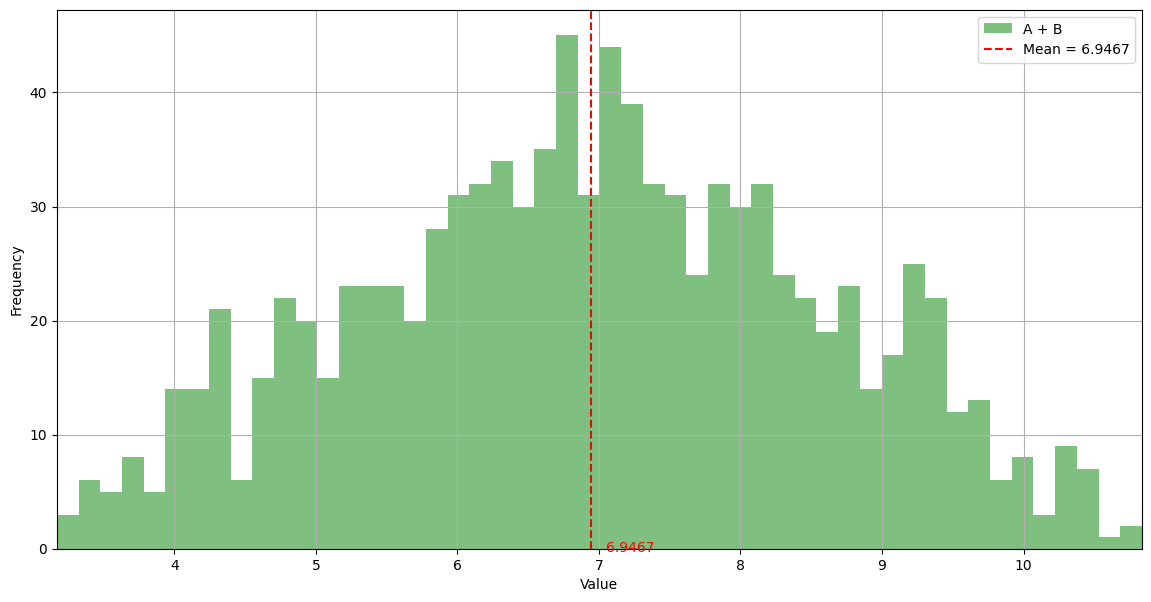

In [60]:
A = np.random.uniform(1, 5, 1000)
B = np.random.uniform(2, 6, 1000)
C = A + B

# create cumlative distribution
# C.sort()
# cum_dist = np.linspace(0.,1.,len(C))
mean = np.mean(C)


# Plot the histogram
plt.figure(figsize=(14, 7))
plt.hist(C, bins=50, alpha=0.5, label='A + B', color='g', density=True)
plt.axvline(mean, color='r', linestyle='--', label=f'Mean = {mean:.4f}')
plt.text(mean + 0.1, 0.1, f'{mean:.4f}', color='r', va='center', ha='left')
plt.xlim(C.min(), C.max())
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()